In [ ]:
from keras.datasets import mnist
(x_train, y_train_label), (x_test, y_test_label) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train_label.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(x_test.shape)
print(y_test_label.shape)

(10000, 28, 28)
(10000,)


In [ ]:
print(y_train_label)

[5 0 4 ... 5 6 8]


In [ ]:
# one-hot encode
import numpy as np

def one_hot_encode(sequences, dimension=10):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
y_train = one_hot_encode(y_train_label)
y_test = one_hot_encode(y_test_label)

In [ ]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

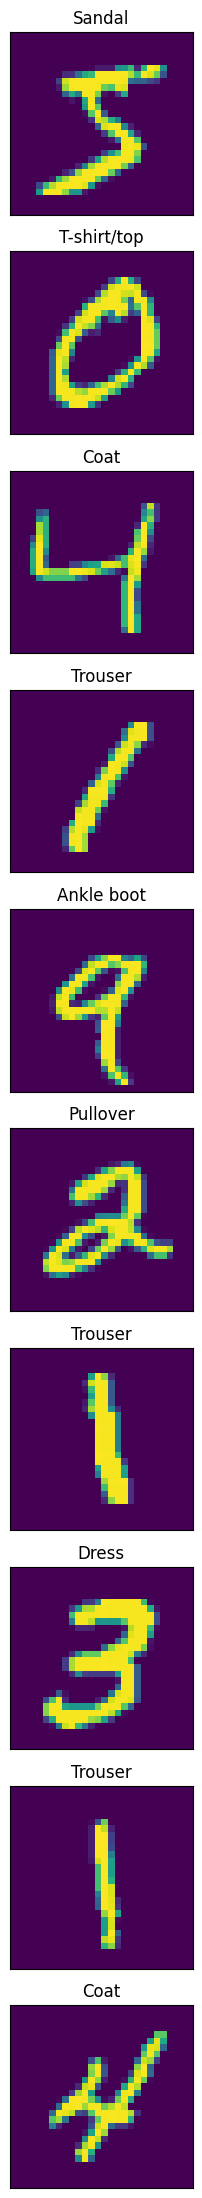

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(10, figsize = (28, 28))
for i in range(10):
  ax[i].imshow(x_train[i])
  ax[i].set_title(f"{labels[y_train_label[i]]}")
  ax[i].set_xticks([])
  ax[i].set_yticks([])

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
x_train = x_train.astype('float') / 255
x_test = x_test.astype('float') / 255

In [ ]:
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = models.Sequential()
model.add(Conv2D(64, kernel_size=2, padding="same", activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(32, kernel_size=2, padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

dataGen = ImageDataGenerator(rotation_range=15,width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.15,zoom_range=[0.5,2],validation_split=0.2)
dataGen.fit(x_train)

train_generator = dataGen.flow(x_train, y_train, batch_size=64, shuffle=True, 
                               seed=2, save_to_dir=None, subset='training')

validation_generator = dataGen.flow(x_train, y_train, batch_size=64, shuffle=True, 
                               seed=2, save_to_dir=None, subset='validation')

history = model.fit_generator(train_generator, epochs=2, validation_data=validation_generator)

Epoch 1/2


<ipython-input-16-9a032fa73d0c>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=2, validation_data=validation_generator)


750/750 [==============================] - 50s 66ms/step - loss: 0.1931 - acc: 0.6086 - val_loss: 0.1149 - val_acc: 0.8108
Epoch 2/2
750/750 [==============================] - 49s 66ms/step - loss: 0.0921 - acc: 0.8529 - val_loss: 0.0798 - val_acc: 0.8708


In [ ]:
results = model.evaluate(x_test, y_test)
print("results ", results[1])

313/313 [==============================] - 2s 8ms/step - loss: 0.0328 - acc: 0.9538
results  0.9538000226020813


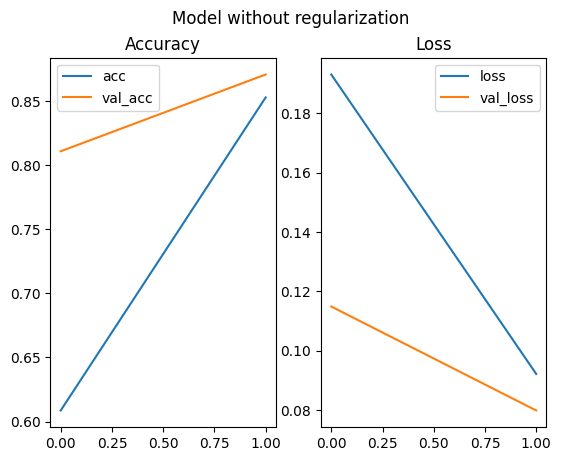

In [ ]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2)

axis[0].plot(range(len(history.history['acc'])), history.history['acc'], label='acc')
axis[0].plot(range(len(history.history['val_acc'])), history.history['val_acc'], label='val_acc')
axis[0].set_title("Accuracy")
axis[0].legend()

axis[1].plot(range(len(history.history['loss'])), history.history['loss'], label='loss')
axis[1].plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='val_loss')
axis[1].set_title("Loss")
axis[1].legend()

figure.suptitle("Model without regularization")
plt.show()